In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## ```1. Data Import and Cleaning```

In [2]:
df = pd.read_csv('Pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [3]:
# drop index column
df = df.drop(columns='#')

In [4]:
# checking null values
df.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [5]:
# remove Type 2 column as it has many NULL values
df = df.drop(columns=['Type 2',"Name"])
df

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,318,45,49,49,65,65,45,1,False
1,Grass,405,60,62,63,80,80,60,1,False
2,Grass,525,80,82,83,100,100,80,1,False
3,Grass,625,80,100,123,122,120,80,1,False
4,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...
795,Rock,600,50,100,150,100,150,50,6,True
796,Rock,700,50,160,110,160,110,110,6,True
797,Psychic,600,80,110,60,150,130,70,6,True
798,Psychic,680,80,160,60,170,130,80,6,True


## ```2. Data Scaling and Visualization```

In [6]:
# checking for categorical variables
df_cat = df.select_dtypes(exclude=['number'])
df_cat

,Type 1,Legendary
0,Grass,False
1,Grass,False
2,Grass,False
3,Grass,False
4,Fire,False
...,...,...
795,Rock,True
796,Rock,True
797,Psychic,True
798,Psychic,True


In [7]:
df_numeric = df.select_dtypes('number')

In [8]:
# standardizing the numerical features
mean = df_numeric.mean()
std = df_numeric.std()
df_numeric = (df_numeric-mean)/std
df_numeric

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,-0.976155,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,-1.398762
1,-0.250931,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,-1.398762
2,0.749377,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,-1.398762
3,1.582967,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,-1.398762
4,-1.051178,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,-1.398762
...,...,...,...,...,...,...,...,...
795,1.374569,-0.754220,0.646964,2.442237,0.830626,2.806344,-0.628947,1.610947
796,2.208159,-0.754220,2.495543,1.159507,2.664239,1.368990,1.435713,1.610947
797,1.374569,0.420654,0.955061,-0.443905,2.358637,2.087667,0.059273,1.610947
798,2.041441,0.420654,2.495543,-0.443905,2.969841,2.087667,0.403383,1.610947


[]

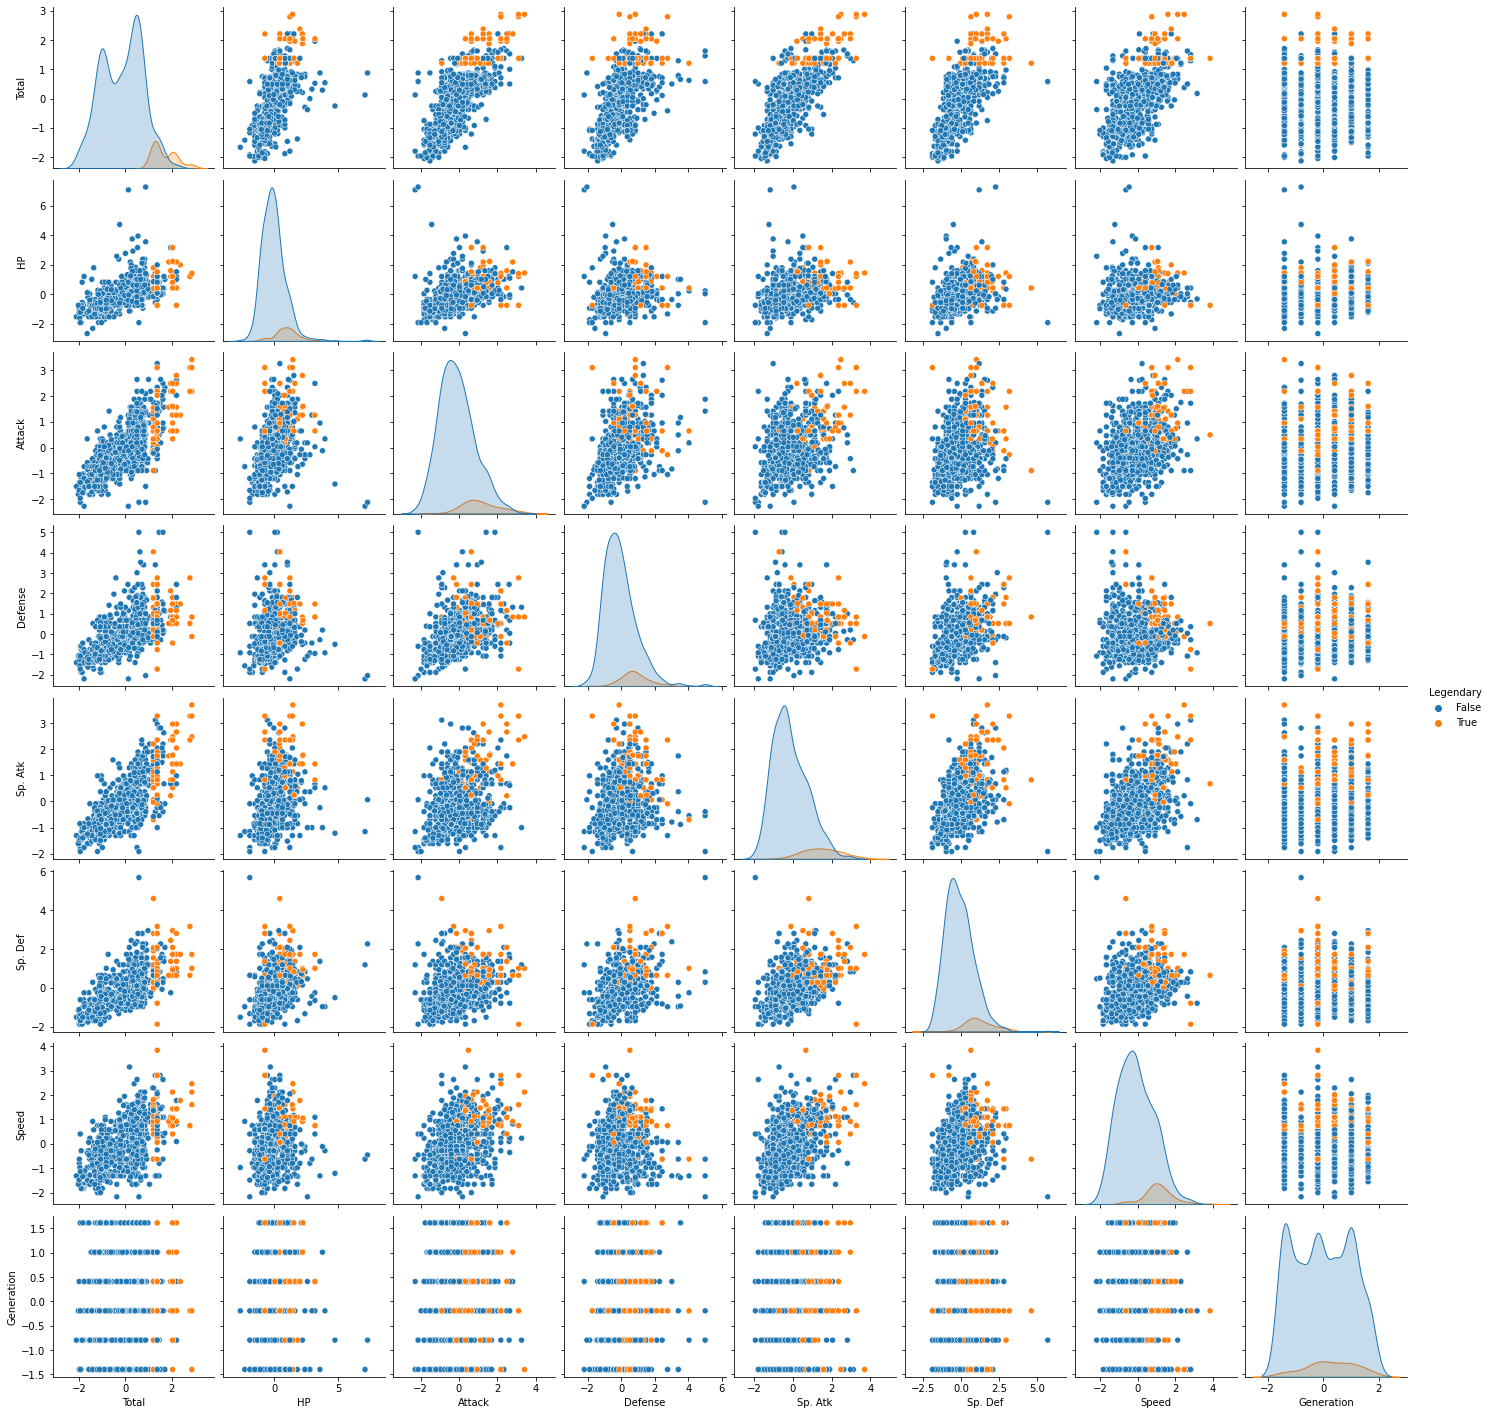

In [9]:
# plotting pair plots
df_temp = df_numeric
df_temp["Legendary"] = df["Legendary"]
sns.pairplot(df_temp,hue="Legendary")
plt.plot()

In [10]:
# one hot encoding 
df_encoded = pd.get_dummies(df_cat)
df_encoded

,Legendary,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water
0,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
796,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
797,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
798,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [11]:
df_numeric

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,-0.976155,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,-1.398762,False
1,-0.250931,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,-1.398762,False
2,0.749377,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,-1.398762,False
3,1.582967,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,-1.398762,False
4,-1.051178,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,-1.398762,False
...,...,...,...,...,...,...,...,...,...
795,1.374569,-0.754220,0.646964,2.442237,0.830626,2.806344,-0.628947,1.610947,True
796,2.208159,-0.754220,2.495543,1.159507,2.664239,1.368990,1.435713,1.610947,True
797,1.374569,0.420654,0.955061,-0.443905,2.358637,2.087667,0.059273,1.610947,True
798,2.041441,0.420654,2.495543,-0.443905,2.969841,2.087667,0.403383,1.610947,True


In [12]:
df_encoded = df_encoded.drop(columns='Legendary')

In [13]:
df_encoded.index = df_numeric.index
df = pd.concat([df_encoded,df_numeric], axis=1)

In [14]:
df

,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,...,Type 1_Water,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,0,0,0,0,0,0,0,0,1,...,0,-0.976155,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,-1.398762,False
1,0,0,0,0,0,0,0,0,0,1,...,0,-0.250931,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,-1.398762,False
2,0,0,0,0,0,0,0,0,0,1,...,0,0.749377,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,-1.398762,False
3,0,0,0,0,0,0,0,0,0,1,...,0,1.582967,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,-1.398762,False
4,0,0,0,0,0,0,1,0,0,0,...,0,-1.051178,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,-1.398762,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,0,0,0,0,0,0,0,...,0,1.374569,-0.754220,0.646964,2.442237,0.830626,2.806344,-0.628947,1.610947,True
796,0,0,0,0,0,0,0,0,0,0,...,0,2.208159,-0.754220,2.495543,1.159507,2.664239,1.368990,1.435713,1.610947,True
797,0,0,0,0,0,0,0,0,0,0,...,0,1.374569,0.420654,0.955061,-0.443905,2.358637,2.087667,0.059273,1.610947,True
798,0,0,0,0,0,0,0,0,0,0,...,0,2.041441,0.420654,2.495543,-0.443905,2.969841,2.087667,0.403383,1.610947,True


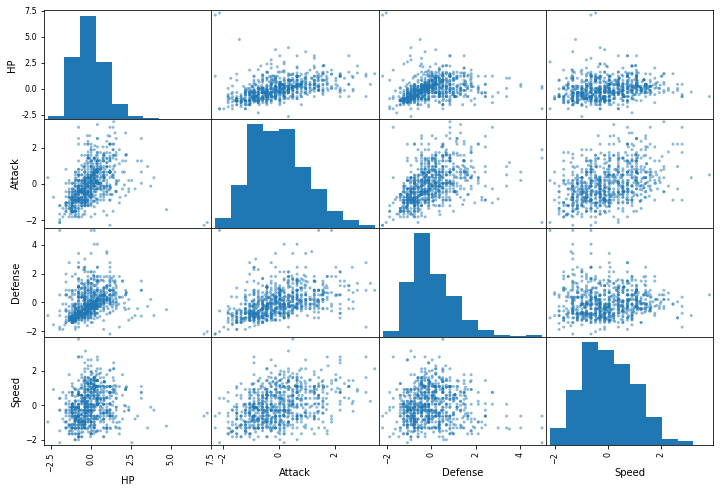

In [15]:
# plotting scatter matrix
from pandas.plotting import scatter_matrix
attributes = ["HP","Attack","Defense","Speed"]
scatter_matrix(df[attributes],figsize=(12,8))
plt.show()

## ```3. PCA Application```

In [16]:
df_y = df["Legendary"]
df_x = df.drop(columns='Legendary')

In [17]:
print(df_x.shape)

(800, 26)


In [18]:
print(df_y.shape)
df_y = pd.DataFrame(df_y)
df_y

(800,)


,Legendary
0,False
1,False
2,False
3,False
4,False
...,...
795,True
796,True
797,True
798,True


In [19]:
df_types = df_cat["Type 1"]
df_types

0        Grass
1        Grass
2        Grass
3        Grass
4         Fire
        ...   
795       Rock
796       Rock
797    Psychic
798    Psychic
799       Fire
Name: Type 1, Length: 800, dtype: object

In [20]:
# implement pca on cleaned and scaled dataset
# create a pca instance
pca = PCA()

# Fit the data and transform it to the principal components
principal_components = pca.fit_transform(df_x)

pca_df = pd.DataFrame(data=principal_components)

# new pca dataframe
pca_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-1.888224,-0.497254,1.263407,0.531716,0.245971,-0.509791,-0.323040,-0.251345,-0.267932,0.805377,...,0.005236,0.007501,-0.050344,-0.014987,0.017267,0.033483,-0.018139,0.008728,-1.046726e-14,1.991728e-15
1,-0.494682,-0.541138,1.302365,0.525841,0.345746,-0.333238,-0.217339,-0.256227,-0.293901,0.805127,...,-0.012745,0.002268,-0.037788,-0.007807,0.008578,0.027858,-0.014111,0.006094,4.025735e-15,-2.921913e-16
2,1.425052,-0.574743,1.362971,0.470434,0.430732,-0.111398,-0.094428,-0.261093,-0.324659,0.805680,...,-0.038189,-0.007517,-0.020675,-0.001445,-0.001021,0.016512,-0.006026,0.003034,6.672276e-15,1.488839e-15
3,3.002679,0.108717,1.759341,0.805804,-0.074448,-0.391581,0.051421,-0.313670,-0.206508,0.787411,...,-0.060443,-0.002291,-0.000758,0.002351,-0.052148,-0.064335,0.008189,0.005533,2.051369e-14,8.122111e-16
4,-2.082627,-1.158332,1.026110,0.246488,-0.224623,-0.278188,-0.104863,-0.151020,-0.102320,-0.102426,...,0.044762,-0.005871,-0.092780,-0.047155,0.019191,-0.001276,0.000869,0.004195,-2.633250e-15,-1.618565e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.743090,2.657983,-0.273283,2.016882,-1.137439,-0.082527,-0.722573,-0.044046,0.306883,-0.002487,...,-0.054814,0.124528,0.102058,0.031342,-0.104329,-0.011830,-0.084135,-0.010922,-9.181085e-17,5.332467e-16
796,4.239695,-0.202227,-1.457495,0.766602,-1.990117,-1.203777,-0.655980,-0.048988,0.349117,-0.040824,...,-0.093357,0.115498,0.190936,0.100637,-0.053945,0.103728,-0.053947,-0.029659,-9.371465e-17,-1.590301e-15
797,2.874248,0.009422,-1.565872,1.415399,0.672552,-1.074299,-1.268731,-0.076653,0.128207,-0.241526,...,-0.069210,-0.004811,0.081959,-0.061465,0.007288,0.014731,-0.075413,-0.007487,3.323929e-18,-3.166323e-17
798,4.139538,-0.380531,-1.741530,0.707542,0.060040,-1.633767,-1.826854,-0.041208,0.214569,-0.243477,...,-0.110339,-0.033338,0.121564,-0.084029,0.051032,0.019705,-0.053262,-0.004623,-1.684145e-18,-9.698960e-16


In [21]:
# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [4.16658765e-01 1.25468411e-01 1.10953478e-01 8.81053097e-02
 8.16964717e-02 4.91840255e-02 3.04086151e-02 1.44176117e-02
 1.09007486e-02 9.46193556e-03 8.16610496e-03 7.45540098e-03
 6.57984772e-03 5.64808650e-03 4.98808362e-03 4.36522861e-03
 4.31642111e-03 4.25362460e-03 3.85302382e-03 3.68432286e-03
 3.34433996e-03 3.18622050e-03 2.32651536e-03 5.77407927e-04
 1.37313165e-31 7.22178813e-32]


- ```Number of principal components taken to capture 90% variance in dataset is 7```

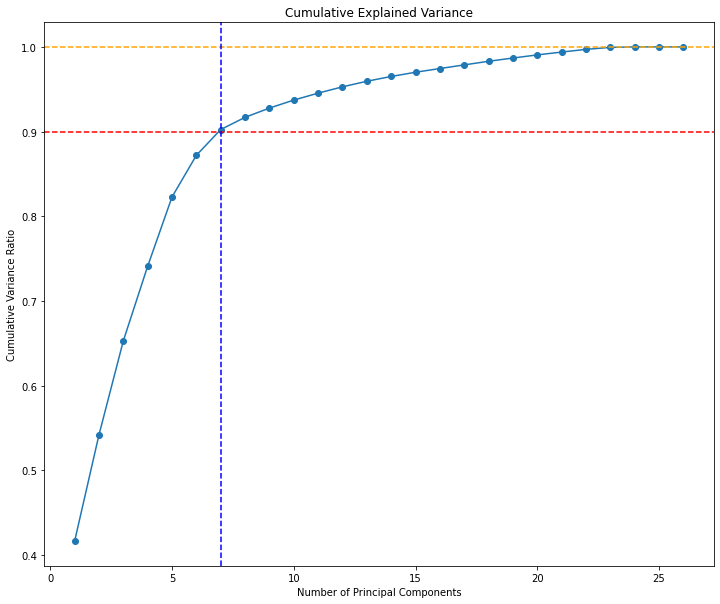

In [22]:
# Plot the cumulative explained variance
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(12,10))

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.axhline(y=0.90, color='red', linestyle='--')
plt.axhline(y=1.00, color='orange', linestyle='--')
plt.axvline(x=7.00, color='blue', linestyle='--')


plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.show()


In [23]:
pca_new = pca_df.iloc[:,:7]
pca_new

,0,1,2,3,4,5,6
0,-1.888224,-0.497254,1.263407,0.531716,0.245971,-0.509791,-0.323040
1,-0.494682,-0.541138,1.302365,0.525841,0.345746,-0.333238,-0.217339
2,1.425052,-0.574743,1.362971,0.470434,0.430732,-0.111398,-0.094428
3,3.002679,0.108717,1.759341,0.805804,-0.074448,-0.391581,0.051421
4,-2.082627,-1.158332,1.026110,0.246488,-0.224623,-0.278188,-0.104863
...,...,...,...,...,...,...,...
795,2.743090,2.657983,-0.273283,2.016882,-1.137439,-0.082527,-0.722573
796,4.239695,-0.202227,-1.457495,0.766602,-1.990117,-1.203777,-0.655980
797,2.874248,0.009422,-1.565872,1.415399,0.672552,-1.074299,-1.268731
798,4.139538,-0.380531,-1.741530,0.707542,0.060040,-1.633767,-1.826854


In [24]:
# adding target feature to new df
pca_new = pd.concat([pca_new,df_y],axis=1)
pca_new

,0,1,2,3,4,5,6,Legendary
0,-1.888224,-0.497254,1.263407,0.531716,0.245971,-0.509791,-0.323040,False
1,-0.494682,-0.541138,1.302365,0.525841,0.345746,-0.333238,-0.217339,False
2,1.425052,-0.574743,1.362971,0.470434,0.430732,-0.111398,-0.094428,False
3,3.002679,0.108717,1.759341,0.805804,-0.074448,-0.391581,0.051421,False
4,-2.082627,-1.158332,1.026110,0.246488,-0.224623,-0.278188,-0.104863,False
...,...,...,...,...,...,...,...,...
795,2.743090,2.657983,-0.273283,2.016882,-1.137439,-0.082527,-0.722573,True
796,4.239695,-0.202227,-1.457495,0.766602,-1.990117,-1.203777,-0.655980,True
797,2.874248,0.009422,-1.565872,1.415399,0.672552,-1.074299,-1.268731,True
798,4.139538,-0.380531,-1.741530,0.707542,0.060040,-1.633767,-1.826854,True


## ```4. Visualization of PCA Results```

In [25]:
# adding type 1 feature
pca_new["Type 1"] = df_types
pca_new

,0,1,2,3,4,5,6,Legendary,Type 1
0,-1.888224,-0.497254,1.263407,0.531716,0.245971,-0.509791,-0.323040,False,Grass
1,-0.494682,-0.541138,1.302365,0.525841,0.345746,-0.333238,-0.217339,False,Grass
2,1.425052,-0.574743,1.362971,0.470434,0.430732,-0.111398,-0.094428,False,Grass
3,3.002679,0.108717,1.759341,0.805804,-0.074448,-0.391581,0.051421,False,Grass
4,-2.082627,-1.158332,1.026110,0.246488,-0.224623,-0.278188,-0.104863,False,Fire
...,...,...,...,...,...,...,...,...,...
795,2.743090,2.657983,-0.273283,2.016882,-1.137439,-0.082527,-0.722573,True,Rock
796,4.239695,-0.202227,-1.457495,0.766602,-1.990117,-1.203777,-0.655980,True,Rock
797,2.874248,0.009422,-1.565872,1.415399,0.672552,-1.074299,-1.268731,True,Psychic
798,4.139538,-0.380531,-1.741530,0.707542,0.060040,-1.633767,-1.826854,True,Psychic


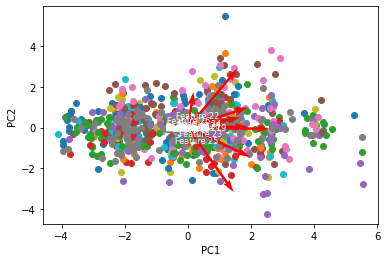

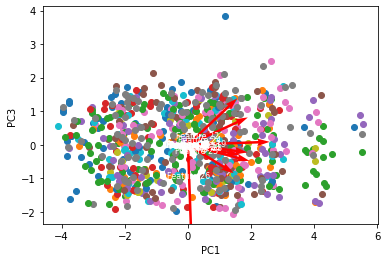

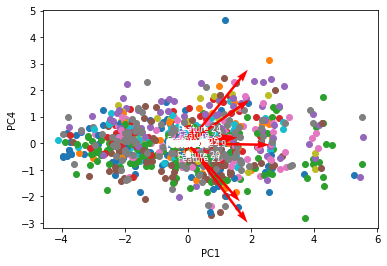

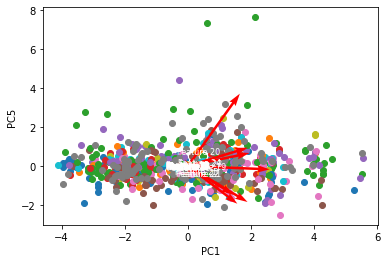

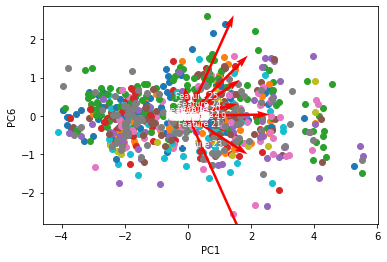

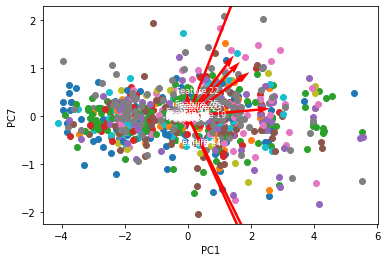

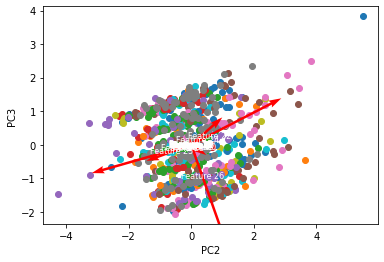

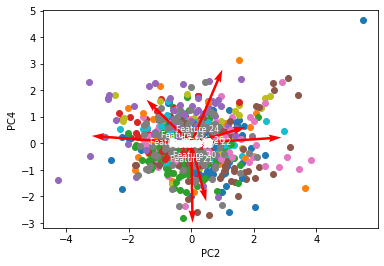

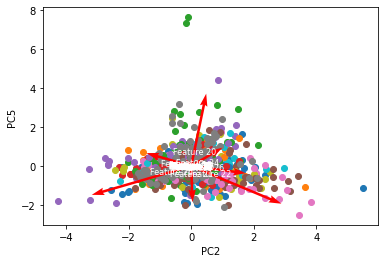

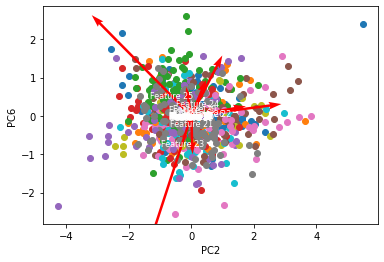

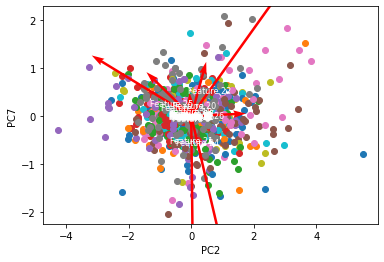

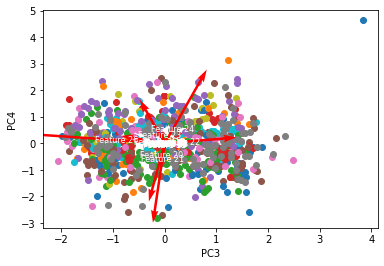

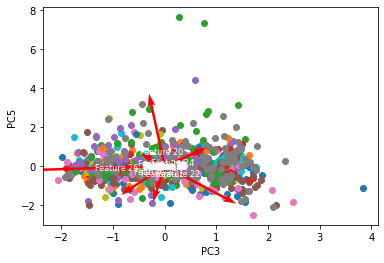

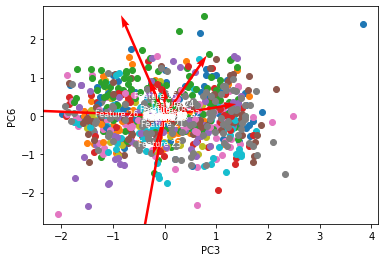

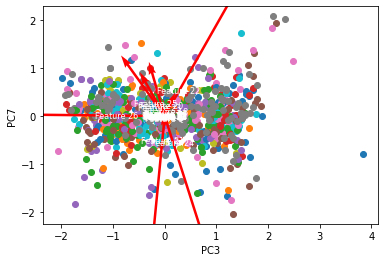

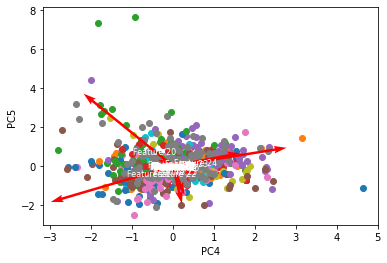

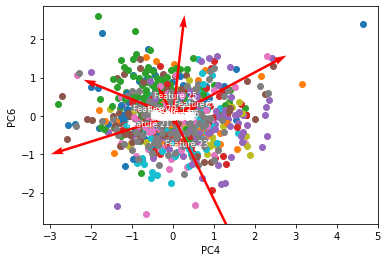

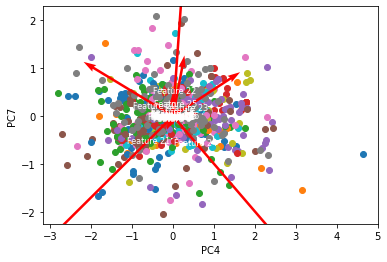

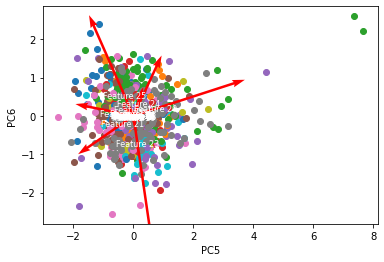

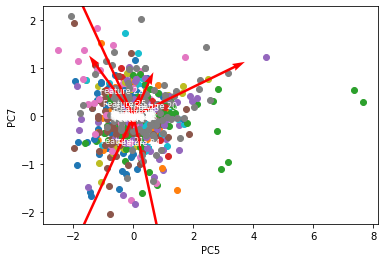

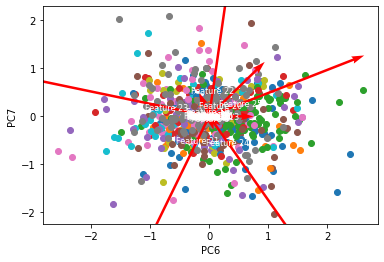

In [26]:
types = np.unique(pca_new['Type 1'])
data_by_type = {t: pca_new[pca_new['Type 1'] == t] for t in types}

for i in range(0,7):
    for j in range(i+1,7):
        for t in types:
            plt.scatter(data_by_type[t][i], data_by_type[t][j], label=f'Type {t}')
        plt.xlabel('PC'+str(i+1))
        plt.ylabel('PC'+str(j+1))
        for k, (pc1, pc2) in enumerate(zip(pca.components_[i], pca.components_[j])):
            plt.quiver(0, 0, pc1, pc2, angles='xy', scale_units='xy', scale=0.2, color='r')
            plt.text(pc1, pc2, f'Feature {k+1}', color='w', ha='center', va='center', fontsize=8)
        plt.show()

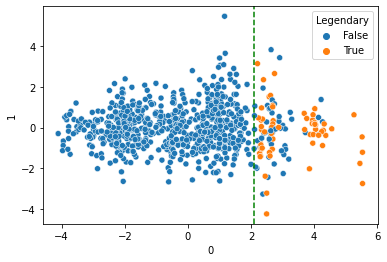

In [27]:
sns.scatterplot(data=pca_new,x=0,y=1,hue="Legendary")
plt.axvline(x=2.10, color='green', linestyle='--')
plt.show()

## ```5. Conclusion and Analysis```

- After performing PCA we find that first 7 principal components capture 90% of variance in dataset, and after that percentage of variance captured does not increase much with respect to increase inn number of components


- Frome the above scatter plot we can see that if our first principal component '0' captures most percent of variance in data, it differentiates wheter a pokemon is legendary or not by a linear boundary as shown by vertical green line.


- Also PCA helps us in reducing dimensionality of dataset to a large extent.